In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models,layers,datasets

# load dataset

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [3]:
x_train.shape   #50000 means the sample and 32x32 means the size of the image and 3 means the rgb(red,green,blue)

(50000, 32, 32, 3)

In [4]:
x_test.shape


(10000, 32, 32, 3)

In [5]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

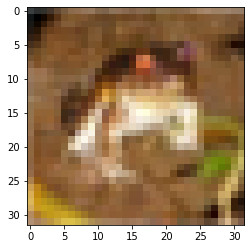

In [6]:
plt.imshow(x_train[0])

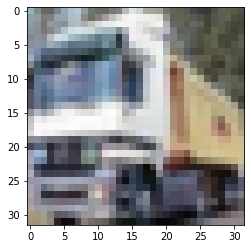

In [7]:
plt.imshow(x_train[1])

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
classes=["airplane","automobile","bird","cat","dear","dog","frog","horse","ship","truck"]

In [12]:
classes[9]

'truck'

In [13]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

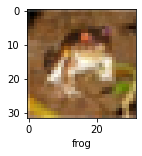

In [14]:
plot_sample(x_train,y_train,0)

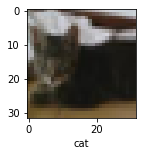

In [15]:
plot_sample(x_train,y_train,9)

In [16]:
#normalizing the data

In [17]:
x_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [18]:
x_train=x_train/255
x_test=x_test/255

In [19]:
ann=models.Sequential([
    layers.Flatten(input_shape=[32,32,3]),
    layers.Dense(3000,activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="sigmoid")
])

In [20]:
ann.compile(optimizer="Adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [21]:
ann.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 409s 259ms/step - loss: 1.9063 - accuracy: 0.3228
Epoch 2/10
1563/1563 [==============================] - 326s 209ms/step - loss: 1.6688 - accuracy: 0.3985
Epoch 3/10
1563/1563 [==============================] - 279s 178ms/step - loss: 1.5873 - accuracy: 0.4305
Epoch 4/10
1563/1563 [==============================] - 276s 177ms/step - loss: 1.5457 - accuracy: 0.4469
Epoch 5/10
1563/1563 [==============================] - 278s 178ms/step - loss: 1.5058 - accuracy: 0.4607
Epoch 6/10
1563/1563 [==============================] - 297s 190ms/step - loss: 1.4795 - accuracy: 0.4697
Epoch 7/10
1563/1563 [==============================] - 286s 183ms/step - loss: 1.4546 - accuracy: 0.4775
Epoch 8/10
1563/1563 [==============================] - 260s 167ms/step - loss: 1.4286 - accuracy: 0.4883
Epoch 9/10
1563/1563 [==============================] - 249s 159ms/step - loss: 1.4154 - accuracy: 0.4916
Epoch 10/10
1563/1563 [=======================

In [24]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 14ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.62      0.53      1000
           1       0.51      0.69      0.58      1000
           2       0.33      0.26      0.29      1000
           3       0.36      0.26      0.30      1000
           4       0.38      0.43      0.40      1000
           5       0.38      0.37      0.37      1000
           6       0.49      0.52      0.51      1000
           7       0.49      0.59      0.53      1000
           8       0.74      0.37      0.49      1000
           9       0.52      0.48      0.50      1000

    accuracy                           0.46     10000
   macro avg       0.47      0.46      0.45     10000
weighted avg       0.47      0.46      0.45     10000



In [25]:
#build the nueral network

In [26]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), #kernel size means the size of the filter
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [27]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4947 - accuracy: 0.4641
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1304 - accuracy: 0.6055
Epoch 3/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.0022 - accuracy: 0.6512
Epoch 4/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9133 - accuracy: 0.6833
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8529 - accuracy: 0.7026
Epoch 6/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8020 - accuracy: 0.7207
Epoch 7/10
1563/1563 [==============================] - 144s 92ms/step - loss: 0.7570 - accuracy: 0.7372
Epoch 8/10
1563/1563 [==============================] - 146s 93ms/step - loss: 0.7132 - accuracy: 0.7511
Epoch 9/10
1563/1563 [==============================] - 144s 92ms/step - loss: 0.6786 - accuracy: 0.7652
Epoch 10/10
1563/1563 [==============================] - 144s

In [29]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.8878 - accuracy: 0.7034


[0.8878082036972046, 0.7034000158309937]

In [30]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [31]:
#convert the 2d array into the id

In [32]:
y_test=y_test.reshape(-1,)

In [33]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

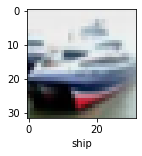

In [34]:
plot_sample(x_test,y_test,1)

In [35]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 10s 31ms/step


array([[1.6129755e-03, 2.3312228e-04, 1.0973855e-03, 9.2177695e-01,
        2.8222974e-04, 6.2027689e-02, 1.2359589e-03, 1.1506234e-04,
        9.1602029e-03, 2.4584057e-03],
       [6.0629547e-03, 1.3288817e-02, 8.2523347e-06, 4.2791798e-05,
        5.1576753e-05, 9.2705881e-07, 1.5657177e-07, 9.9761983e-06,
        9.8027289e-01, 2.6168293e-04],
       [2.4346072e-02, 1.4215697e-01, 5.5292493e-04, 9.2230430e-03,
        8.2370332e-03, 2.6596163e-04, 1.5279347e-04, 6.7114141e-03,
        7.3900402e-01, 6.9349796e-02],
       [9.0296197e-01, 2.3551339e-02, 9.6449349e-03, 5.1643664e-04,
        9.3514333e-03, 7.4805466e-06, 8.1946651e-05, 6.6554327e-05,
        5.3195935e-02, 6.2184106e-04],
       [6.8490626e-06, 2.9800211e-05, 3.5126813e-02, 1.8663193e-01,
        4.6562257e-01, 1.9957274e-03, 3.1057385e-01, 4.3910245e-07,
        1.1679873e-05, 2.5561840e-07]], dtype=float32)

In [36]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [37]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

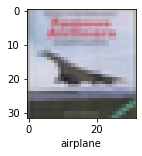

In [39]:
plot_sample(x_test,y_test,3)

In [40]:
classes[y_classes[3]]

'airplane'

In [41]:
classes[y_classes[3]]

'airplane'

In [43]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.80      0.74      1000
           1       0.83      0.81      0.82      1000
           2       0.63      0.57      0.60      1000
           3       0.54      0.52      0.53      1000
           4       0.63      0.64      0.64      1000
           5       0.63      0.58      0.60      1000
           6       0.76      0.79      0.77      1000
           7       0.71      0.74      0.72      1000
           8       0.85      0.77      0.81      1000
           9       0.75      0.83      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
import tensorflow as tf
from tensorflow.keras import models,layers,datasets
from tensorflow import keras

In [48]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [49]:
x_train.shape

(60000, 28, 28)

In [50]:
x_test.shape

(10000, 28, 28)

In [52]:
x_train[0].shape

(28, 28)

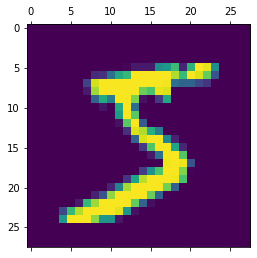

In [53]:
plt.matshow(x_train[0])


In [54]:
y_train[0]

5

In [56]:
X_train = x_train / 255
X_test = x_test / 255

# build the ANN model

In [57]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [58]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 2.4861 - accuracy: 0.8472
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3738 - accuracy: 0.9075
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2891 - accuracy: 0.9261
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2582 - accuracy: 0.9340
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2348 - accuracy: 0.9401
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2249 - accuracy: 0.9426
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2133 - accuracy: 0.9453
Epoch 8/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2023 - accuracy: 0.9477
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1943 - accuracy: 0.9509
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step - l

In [59]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 6ms/step - loss: 0.2838 - accuracy: 0.9401


[0.28383633494377136, 0.9401000142097473]

In [60]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [61]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [62]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)), #30 means the filter and (3,3) means the size of the filter
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [65]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 69s 36ms/step - loss: 3.1869 - accuracy: 0.9736
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2431 - accuracy: 0.9797
Epoch 3/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0973 - accuracy: 0.9839
Epoch 4/10
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0693 - accuracy: 0.9850
Epoch 5/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.0598 - accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 119s 63ms/step - loss: 0.0420 - accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 130s 69ms/step - loss: 0.0333 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0315 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0270 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 77s 

In [66]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [67]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 6s 16ms/step - loss: 0.1252 - accuracy: 0.9795


[0.12520571053028107, 0.9794999957084656]